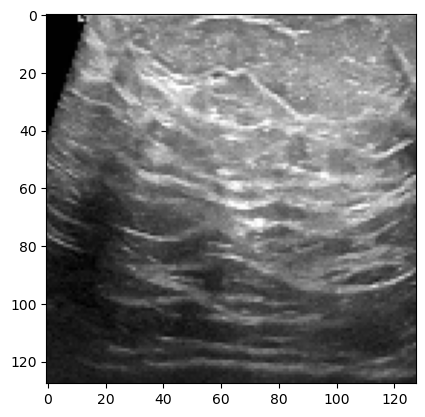

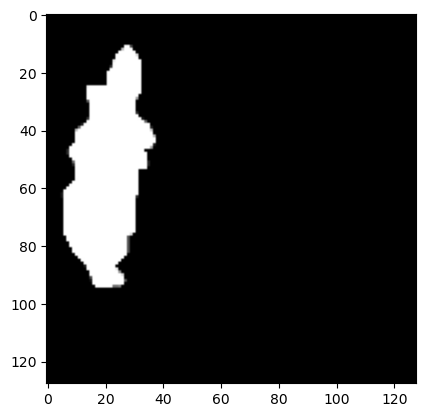

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_17 (Lambda)             (None, 128, 128, 3)  0           ['input_18[0][0]']               
                                                                                                  
 conv2d_323 (Conv2D)            (None, 128, 128, 16  448         ['lambda_17[0][0]']              
                                )                                                                 
                                                                                           

 conv2d_337 (Conv2D)            (None, 64, 64, 32)   18464       ['concatenate_70[0][0]']         
                                                                                                  
 dropout_160 (Dropout)          (None, 64, 64, 32)   0           ['conv2d_337[0][0]']             
                                                                                                  
 conv2d_338 (Conv2D)            (None, 64, 64, 32)   9248        ['dropout_160[0][0]']            
                                                                                                  
 conv2d_transpose_71 (Conv2DTra  (None, 128, 128, 16  2064       ['conv2d_338[0][0]']             
 nspose)                        )                                                                 
                                                                                                  
 concatenate_71 (Concatenate)   (None, 128, 128, 32  0           ['conv2d_transpose_71[0][0]',    
          

In [31]:
import tensorflow as tf
import os
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# seed=42
# tf.random.set_seed(seed)

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

NoTrainData=175
NoTestData=20
X_train = np.zeros((NoTrainData, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((NoTrainData, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)

 

numbers = random.sample(range(1, 181), NoTrainData)

for i in range(NoTrainData):
    img=cv.imread(f"/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant ({numbers[i]}).png")
    img1=cv.imread(f"/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant ({numbers[i]})_mask.png")
    
    X_train[i]=cv.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation= cv.INTER_CUBIC)
    Y_train[i]=cv.resize(img1, (IMG_WIDTH,IMG_HEIGHT), interpolation= cv.INTER_CUBIC)
    

# test images
X_test = np.zeros((NoTestData, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
sizes_test = []


numbers = random.sample(range(181, 210), NoTestData)

for i in range(NoTestData):
    img=cv.imread(f"/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant ({numbers[i]}).png")
    X_test[i]=cv.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation= cv.INTER_CUBIC)


image_x = random.randint(0, NoTrainData)
plt.imshow(X_train[image_x])
plt.show()
plt.imshow(np.squeeze(Y_train[image_x]))
plt.show()

#Build the model

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ################################
# #Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_tumor_detection.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        checkpointer]

results = model.fit(X_train, Y_train, validation_split=0.2, batch_size=30, epochs=70, callbacks=[callbacks])
# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=20, epochs=70)
####################################










5/5 [==============================] - 0s 90ms/step


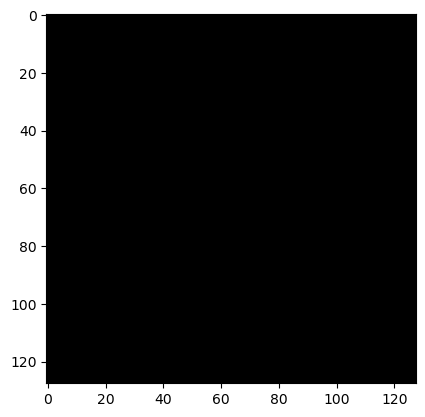

In [33]:


# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test,steps=5, verbose=1)

 
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

plt.subplot(5,1)
for i in range(5):
    plt.imshow(preds_test_t[i])





# # # Perform a sanity check on some random training samples
# ix = random.randint(0, len(preds_train_t))
# plt.imshow(X_train[ix])
# plt.show()
# plt.imshow(np.squeeze(Y_train[ix]))
# plt.show()
# plt.imshow(np.squeeze(preds_train_t[ix]))
# plt.show()

# # Perform a sanity check on some random validation samples
# ix = random.randint(0, len(preds_val_t))
# plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix])
# plt.show()
# plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
# plt.show()
# plt.imshow(np.squeeze(preds_val_t[ix]))
# plt.show





In [ ]:

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
plt.imshow(X_train[ix])
plt.show()
plt.imshow(np.squeeze(Y_train[ix]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.show